# FetchMaker

Congratulations! You have just started working at the hottest new tech startup, FetchMaker. FetchMaker's mission is to match up prospective dog owners with their perfect pet. Data on thousands of adoptable dogs are in FetchMaker's system, and it is your job to analyze some of that data.

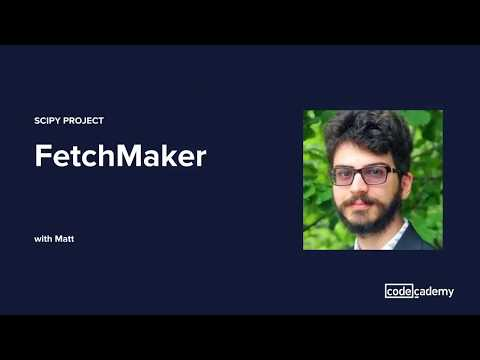

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('vHjJGTSVIFQ', width = 800, height = 500)

***

1. Let us start by including a data interface called `fetchmaker` that will give you access to FetchMaker's dog data.

    Use `import fetchmaker` to import the `fetchmaker` package.

In [2]:
import fetchmaker

2. The attributes that FetchMaker keeps track of are:

    * `weight`, an integer representing how heavy a dog is in pounds
    * `tail_length`, a float representing tail length in inches
    * `age`, in years
    * `color`, a String such as `"brown"` or `"grey"`
    * `is_rescue`, a boolean `0` or `1`

    The `fetchmaker` package lets you access this data for a specific breed of dog with the following format:

        fetchmaker.get_weight("poodle")

    This returns a Pandas DataFrame of the weights of the poodles recorded in the system. The other methods are `get_tail_length`, `get_color`, `get_age`, and `get_is_rescue`, which all take a breed as an input.

    Get the tail lengths of all of the `"rottweiler"`s in the system, and store it in a variable called `rottweiler_tl`.

In [3]:
rottweiler_tl = fetchmaker.get_tail_length("rottweiler")

3. Print out the mean of `rottweiler_tl` and the standard deviation of `rottweiler_tl`, using `np.mean` and `np.std`.

In [4]:
import numpy as np

print(f"Mean rottweiler tail length: {np.mean(rottweiler_tl):.2f}")
print(f"Rottweiler tail length standard deviation: {np.std(rottweiler_tl):.2f}")

Mean rottweiler tail length: 4.24
Rottweiler tail length standard deviation: 2.06


## Data to the rescue

4. Over the years, we have seen that we expect $8\%$ of dogs in the FetchMaker system to be rescues. We want to know if whippets are significantly more or less likely to be a rescue.

    Store the `is_rescue` values for `"whippet"`s in a variable called `whippet_rescue`.

In [5]:
is_rescue = fetchmaker.get_is_rescue("whippet")

5. Use `np.count_nonzero` to get the number of entries in `whippet_rescue` that are `1`. Store this number in a variable called `num_whippet_rescues`.

In [6]:
num_whippet_rescues = np.count_nonzero(is_rescue)

6. Get the number of samples in the whippet set by taking the `np.size` of `whippet_rescue`. Store this in a variable called `num_whippets`.

In [7]:
num_whippets = np.size(is_rescue)

7. Use a binomial test to test the number of whippet rescues, `num_whippet_rescues`, against our expected percentage, $8\%$.

    Remember to import the binomial test by using `from scipy.stats import binom_test`.

In [8]:
from scipy.stats import binom_test

expected_percentage = 0.08

pval = binom_test(num_whippet_rescues, n=num_whippets, p=expected_percentage)

8. Print out the p-value. Is your result significant?

In [9]:
pval

0.5811780106238098

The null hypothesis cannot be rejected at the $5\%$ level of significance because the returned p-value is greater than the critical value of $5\%$. We cannot draw any meaningful conclusion.

## Size does matter
9. Three of our most popular mid-sized dog breeds are whippets, terriers, and pitbulls. Is there a significant difference in the average weights of these three dog breeds? Perform a comparative numerical test to determine if there is a significant difference.

In [10]:
from scipy.stats import f_oneway

whippet_weight = fetchmaker.get_weight("whippet")
terrier_weight = fetchmaker.get_weight("terrier")
pitbull_weight = fetchmaker.get_weight("pitbull")

weight_comparison = f_oneway(whippet_weight, terrier_weight, pitbull_weight)

weight_comparison.pvalue

3.276415588274815e-17

**A:** Since our p-Value is much smaller than $0.05$ we can reject the null hypothesis that the weights come from a population with the same mean. We can concluded that there is a significance difference for at least one of the breeds.

10. Now, perform another test to determine _which_ of the pairs of these dog breeds differ from each other.

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

significance_level = 0.05
values = np.concatenate([whippet_weight, terrier_weight, pitbull_weight])
labels = ['Whippets'] * len(whippet_weight) + ['Terriers'] * len(terrier_weight) + ['Pittbulls'] * len(pitbull_weight)

tukey_results = pairwise_tukeyhsd(values, labels, significance_level)

print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj   lower  upper  reject
--------------------------------------------------------
Pittbulls Terriers   -13.24  0.001 -16.728 -9.752   True
Pittbulls Whippets    -3.34 0.0639  -6.828  0.148  False
 Terriers Whippets      9.9  0.001   6.412 13.388   True
--------------------------------------------------------


## Categorical dog test

11. We want to see if `"poodle"`s and `"shihtzu"`s have significantly different color breakdowns.

    Get the poodle colors and store it in a variable called `poodle_colors`.

    Get the shih tzu colors and store it in a variable called `shihtzu_colors`.

In [12]:
poodle_colors = fetchmaker.get_color("poodle")
shihtzu_colors = fetchmaker.get_color("shihtzu")

12. You can get the number of occurrences of brown poodles by using `np.count_nonzero(poodle_colors == "brown")`.

Use this function to build a Chi Square contingency table, called `color_table`, with the following structure:

|  |Poodle|Shih Tzu|
|:-|:----|:-------|
|Black|x|x|
|Brown|x|x|
|Gold|x|x|
|Grey|x|x|
|White|x|x|

Fill in the "x" entries with the number of each poodle or shih tzu with the specified color.

In [13]:
import pandas as pd

poodle_colors_df = pd.DataFrame(poodle_colors)
shihtzu_colors_df = pd.DataFrame(shihtzu_colors)

poodle_colors_df['breed'] = 'Poodle'
shihtzu_colors_df['breed'] = 'Shih Tzu'

df = poodle_colors_df.append(shihtzu_colors_df, ignore_index=True)
df.reset_index(inplace=True)

df.set_index(['index'])

,color,breed
index,,
0,black,Poodle
1,black,Poodle
2,black,Poodle
3,black,Poodle
4,black,Poodle
...,...,...
195,white,Shih Tzu
196,white,Shih Tzu
197,white,Shih Tzu


In [14]:
contingency_df = df.pivot_table(
    columns='breed',
    index='color',
    values='index',
    aggfunc='count').reset_index()

contingency_df

breed,color,Poodle,Shih Tzu
0,black,17,10
1,brown,13,36
2,gold,8,6
3,grey,52,41
4,white,10,7


In [15]:
color_table = []
for _, row in contingency_df.iterrows():
    color_table.append([row['Poodle'], row['Shih Tzu']])

color_table

[[17, 10], [13, 36], [8, 6], [52, 41], [10, 7]]

13. Feed your `color_table` into SciPy's Chi Square test, save the p-value and print it out.

    Is there a significant difference?

In [16]:
from scipy.stats import chi2_contingency

_, pval, _, _ = chi2_contingency(color_table)
pval

0.005302408293244593

**A:** Since our p-Value is much smaller than $0.05$ we can concluded that there is a significant difference between poodle colors and shih tzu colors.

## Good learner! Have a treat!

14. Great job!

    Feel free to play around with `fetchmaker` more and run some hypothesis tests of your own.

    The breeds you can explore are `"poodle"`, `"rottweiler"`, `"whippet"`, `"greyhound"`, `"terrier"`, `"chihuahua"`, `"shihtzu"`, and `"pitbull"`.